In [16]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from utils import Generator, LoadData
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import albumentations
from albumentations.pytorch import ToTensorV2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


gen_A = Generator(img_channels=3, num_residuals=9).to(device)
gen_B = Generator(img_channels=3, num_residuals=9).to(device)


gen_A.load_state_dict(torch.load("files_2/gen_real.pth"))
gen_B.load_state_dict(torch.load("files_2/gen_ghibili.pth"))

transforms = albumentations.Compose(
    [albumentations.Resize(width=256, height=256),
        albumentations.Normalize(mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5], max_pixel_value=255),
        ToTensorV2(transpose_mask=True)],
    additional_targets={"image0": "image"}, 
    is_check_shapes=False)


dataset = LoadData(root_A=["./test_set/real/"], root_B=["./test_set/ghibili/"], transform=transforms)
loader = DataLoader(dataset, batch_size=1, shuffle=True, pin_memory=True)

In [20]:
# test and display the results

for i, (real, ghibili) in enumerate(loader):
    real = real.to(device)
    ghibili = ghibili.to(device)

    with torch.no_grad():
        fake_A = gen_A(ghibili)
        fake_B = gen_B(real)

    # Save or display the images as needed
    save_image(fake_A, f"./test_set/results/fake_A_{i}.png")
    save_image(fake_B, f"./test_set/results/fake_B_{i}.png")

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

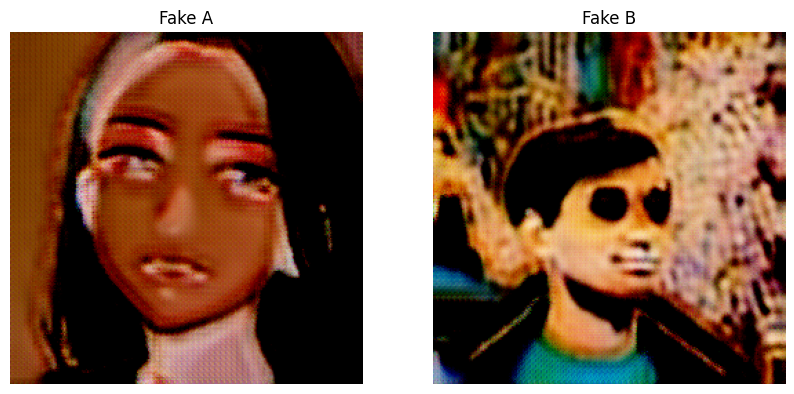

In [21]:
# display the results

import matplotlib.image as mpimg

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Fake A")
img = mpimg.imread(f"./test_set/results/fake_A_0.png")
plt.imshow(img)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Fake B")
img = mpimg.imread(f"./test_set/results/fake_B_0.png")
plt.imshow(img)
plt.axis("off")